In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm
import uproot3

In [2]:
mini = uproot3.open("rootuple_2018_UpsPiPi_covMatrix_v4.root")['rootuple;1']['CandidateTree;1']

In [3]:
len(mini)

1362812

In [4]:
data_mini=mini.pandas.df()

In [5]:
data_mini.head()

,run,event,luminosityBlock,nCandPerEvent,numPrimaryVertices,trigger,candidate_p4.fX,candidate_p4.fY,candidate_p4.fZ,candidate_p4.fE,...,mu2_SLamLam,mu2_SLamPhi,mu2_SLamDxy,mu2_SLamDsz,mu2_SPhiPhi,mu2_SPhiDxy,mu2_SPhiDsz,mu2_SDxyDxy,mu2_SDxyDsz,mu2_SDszDsz
entry,,,,,,,,,,,,,,,,,,,,,
0,321988,913479513,521,1,30,128,11.037201,10.483199,-11.264761,21.446402,...,6.008717e-08,2.467943e-09,-2.618969e-08,-5.775142e-07,1.371015e-07,-8.095049e-07,-3.390080e-08,0.000006,3.670992e-07,0.000007
1,321988,913857365,521,3,30,128,-13.272601,5.394998,0.682575,17.518179,...,1.227854e-07,-4.760227e-10,6.406638e-09,-8.471935e-07,5.484878e-08,-3.137560e-07,2.970072e-09,0.000002,-4.403954e-08,0.000007
2,321988,913857365,521,3,30,128,-13.297990,5.576695,0.615847,17.577517,...,1.227854e-07,-4.760227e-10,6.406638e-09,-8.471935e-07,5.484878e-08,-3.137560e-07,2.970072e-09,0.000002,-4.403954e-08,0.000007
3,321988,913857365,521,3,30,128,-13.321217,5.312821,0.318810,17.540969,...,1.227854e-07,-4.760227e-10,6.406638e-09,-8.471935e-07,5.484878e-08,-3.137560e-07,2.970072e-09,0.000002,-4.403954e-08,0.000007
4,321988,914943087,521,1,33,128,-5.148066,21.437214,4.166191,24.565197,...,7.978687e-08,9.098979e-10,-5.849043e-09,-7.509793e-07,4.577199e-08,-2.677299e-07,-9.283950e-09,0.000002,5.596505e-08,0.000008


In [6]:
data_mini_1 = data_mini[(data_mini["candidate_vProb"]>0.05)]
data_mini_2 = data_mini[(data_mini["candidate_vProb"]>0.05) & (data_mini["candidate_vMass"]>10.01) & (data_mini["candidate_vMass"]<10.03)]

In [7]:
covMatrixLab_trk1=["track1_SQopQop","track1_SQopLam","track1_SQopPhi","track1_SQopDxy","track1_SQopDsz","track1_SLamLam","track1_SLamPhi","track1_SLamDxy","track1_SLamDsz","track1_SPhiPhi","track1_SPhiDxy","track1_SPhiDsz","track1_SDxyDxy","track1_SDxyDsz","track1_SDszDsz"]
covMatrixLab_trk2=["track2_SQopQop","track2_SQopLam","track2_SQopPhi","track2_SQopDxy","track2_SQopDsz","track2_SLamLam","track2_SLamPhi","track2_SLamDxy","track2_SLamDsz","track2_SPhiPhi","track2_SPhiDxy","track2_SPhiDsz","track2_SDxyDxy","track2_SDxyDsz","track2_SDszDsz"]

In [8]:
def symmetricize(a):
    s = int((np.sqrt(a.size*8+1)-1)*0.5)
    m = np.zeros((s,s))
    for i in range(s):
        F = s + np.sum(np.arange(s-1,s-i-1,-1))
        I = F - s + i
        m[i,i:] = a[I:F]
    for i in range(s):
        m[i:,i] = m[i,i:]
    return m

In [9]:
C_mini_vec_trk1 = data_mini[covMatrixLab_trk1].values[:]
M_mini_trk1 = np.array([symmetricize(f) for f in tqdm(C_mini_vec_trk1)])
V_mini_trk1 = np.array([np.linalg.eigvals(M) for M in tqdm(M_mini_trk1)])

C_mini_vec_trk2 = data_mini[covMatrixLab_trk2].values[:]
M_mini_trk2 = np.array([symmetricize(f) for f in tqdm(C_mini_vec_trk2)])
V_mini_trk2 = np.array([np.linalg.eigvals(M) for M in tqdm(M_mini_trk2)])

100%|███████████████████████████████████████████████████████████████████| 1362812/1362812 [00:23<00:00, 56869.77it/s]


In [10]:
C_mini_vec_trk1_1 = data_mini_1[covMatrixLab_trk1].values[:]
M_mini_trk1_1 = np.array([symmetricize(f) for f in tqdm(C_mini_vec_trk1_1)])
V_mini_trk1_1 = np.array([np.linalg.eigvals(M) for M in tqdm(M_mini_trk1_1)])

C_mini_vec_trk2_1 = data_mini_1[covMatrixLab_trk2].values[:]
M_mini_trk2_1 = np.array([symmetricize(f) for f in tqdm(C_mini_vec_trk2_1)])
V_mini_trk2_1 = np.array([np.linalg.eigvals(M) for M in tqdm(M_mini_trk2_1)])

100%|███████████████████████████████████████████████████████████████████| 1010999/1010999 [00:18<00:00, 54970.79it/s]


In [11]:
C_mini_vec_trk1_2 = data_mini_2[covMatrixLab_trk1].values[:]
M_mini_trk1_2 = np.array([symmetricize(f) for f in tqdm(C_mini_vec_trk1_2)])
V_mini_trk1_2 = np.array([np.linalg.eigvals(M) for M in tqdm(M_mini_trk1_2)])

C_mini_vec_trk2_2 = data_mini_2[covMatrixLab_trk2].values[:]
M_mini_trk2_2 = np.array([symmetricize(f) for f in tqdm(C_mini_vec_trk2_2)])
V_mini_trk2_2 = np.array([np.linalg.eigvals(M) for M in tqdm(M_mini_trk2_2)])

100%|█████████████████████████████████████████████████████████████████████| 165990/165990 [00:02<00:00, 55461.10it/s]


bad_index =np.where((np.min(V_mini,axis=1)<0))[0]
float(len(bad_index))/float(len(V_mini))

Text(0, 0.5, 'Num. of Cand.')

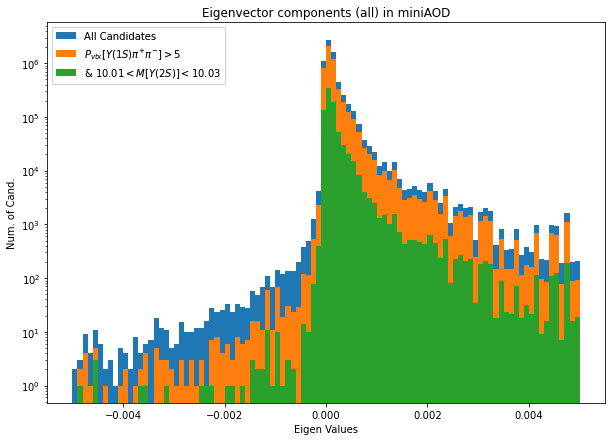

In [36]:
plt.figure(figsize=(10,7))
plt.hist((V_mini_trk1.flatten()),range=(-0.005,0.005),bins=100,log=True,label="All Candidates");
plt.hist((V_mini_trk1_1.flatten()),range=(-0.005,0.005),bins=100,log=True,label="$P_{vtx}[Y(1S)\pi^{+}\pi^{-}] > 5%$");
plt.hist((V_mini_trk1_2.flatten()),range=(-0.005,0.005),bins=100,log=True,label="$&\ 10.01 < M[Y(2S)] < 10.03$");
plt.title("Eigenvector components (Track1) in miniAOD")
legend1 = plt.legend(loc=2)
#legend2 = plt.legend(["miniAOD"],loc=2)
#legend2.legendHandles[0].set_color('red')
plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)
plt.xlabel('Eigen Values')
plt.ylabel('Num. of Cand.')

Text(0, 0.5, 'Num. of Cand.')

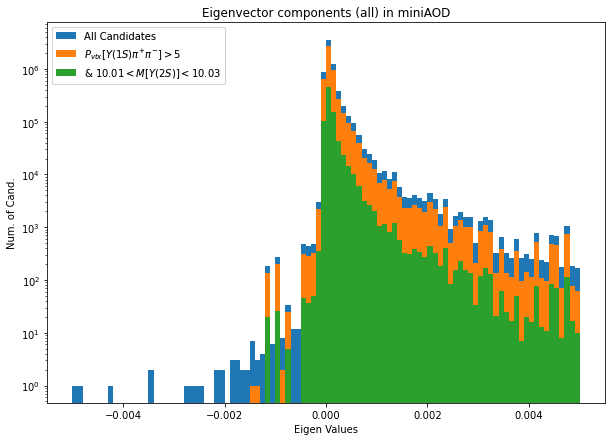

In [37]:
plt.figure(figsize=(10,7))
plt.hist((V_mini_trk2.flatten()),range=(-0.005,0.005),bins=100,log=True,label="All Candidates");
plt.hist((V_mini_trk2_1.flatten()),range=(-0.005,0.005),bins=100,log=True,label="$P_{vtx}[Y(1S)\pi^{+}\pi^{-}] > 5%$");
plt.hist((V_mini_trk2_2.flatten()),range=(-0.005,0.005),bins=100,log=True,label="$&\ 10.01 < M[Y(2S)] < 10.03$");
plt.title("Eigenvector components (Track2) in miniAOD")
legend1 = plt.legend(loc=2)
#legend2 = plt.legend(["miniAOD"],loc=2)
#legend2.legendHandles[0].set_color('red')
plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)
plt.xlabel('Eigen Values')
plt.ylabel('Num. of Cand.')

Text(0, 0.5, 'Num. of Cand.')

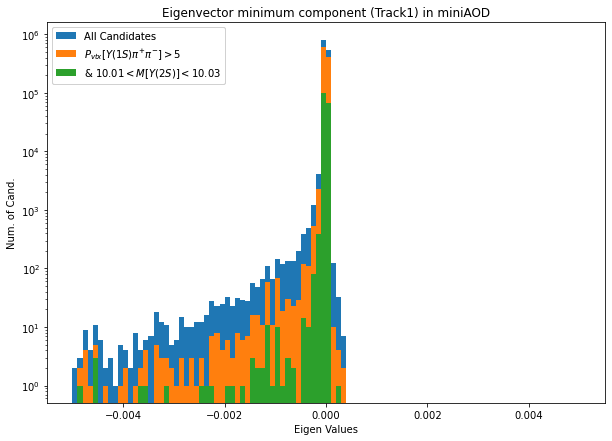

In [39]:
plt.figure(figsize=(10,7))
plt.hist(np.min(V_mini_trk1,axis=1),range=(-0.005,0.005),bins=100,log=True,label="All Candidates");
plt.hist(np.min(V_mini_trk1_1,axis=1),range=(-0.005,0.005),bins=100,log=True,label="$P_{vtx}[Y(1S)\pi^{+}\pi^{-}] > 5%$");
plt.hist(np.min(V_mini_trk1_2,axis=1),range=(-0.005,0.005),bins=100,log=True,label="$&\ 10.01 < M[Y(2S)] < 10.03$");
plt.title("Eigenvector minimum component (Track1) in miniAOD")
legend1 = plt.legend(loc=2)
#legend2 = plt.legend(["miniAOD"],loc=2)
#legend2.legendHandles[0].set_color('red')
plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)
plt.xlabel('Eigen Values')
plt.ylabel('Num. of Cand.')

Text(0, 0.5, 'Num. of Cand.')

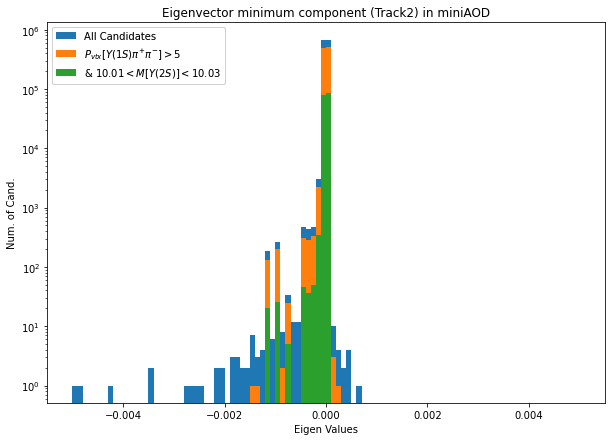

In [38]:
plt.figure(figsize=(10,7))
plt.hist(np.min(V_mini_trk2,axis=1),range=(-0.005,0.005),bins=100,log=True,label="All Candidates");
plt.hist(np.min(V_mini_trk2_1,axis=1),range=(-0.005,0.005),bins=100,log=True,label="$P_{vtx}[Y(1S)\pi^{+}\pi^{-}] > 5%$");
plt.hist(np.min(V_mini_trk2_2,axis=1),range=(-0.005,0.005),bins=100,log=True,label="$&\ 10.01 < M[Y(2S)] < 10.03$");
plt.title("Eigenvector minimum component (Track2) in miniAOD")
legend1 = plt.legend(loc=2)
#legend2 = plt.legend(["miniAOD"],loc=2)
#legend2.legendHandles[0].set_color('red')
plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)
plt.xlabel('Eigen Values')
plt.ylabel('Num. of Cand.')